<a href="https://colab.research.google.com/github/dhdbsrlw/2023F-ML-Topic-Modelling/blob/main/Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

#Prev. 데이터셋 임포트

In [ ]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

# now you can see files
!echo -e "\nNumber of Google drive files in /content/drive/My Drive/:"
!ls -a "/content/drive/MyDrive/23-2_기계학습_팀플"
# by the way, you can run any linux command by putting a ! at the start of the line

# by default everything gets executed and saved in /content/
!echo -e "\nCurrent directory:"
!pwd

Mounted at /content/drive

Number of Google drive files in /content/drive/My Drive/:
ls: cannot access '/content/drive/MyDrive/23-2_기계학습_팀플': No such file or directory

Current directory:
/content


In [ ]:
workspace_path = '/content/drive/MyDrive/23-2_기계학습_팀플'  # Change this path!
print(f'Current Workspace: {workspace_path}')

Current Workspace: /content/drive/MyDrive/23-2_기계학습_팀플


In [ ]:
# (1) 'full_beauty' dataset import
ds_full_beauty = pd.read_csv(f'{workspace_path}/dataset/full_beauty.csv')
ds_full_beauty.info() # 총 9,9988 개의 리뷰
ds_full_beauty.head()

FileNotFoundError: ignored

In [ ]:
# (2) delete NULL
ds_full_beauty = ds_full_beauty[ds_full_beauty["review"].notnull()].reset_index(drop=True)

# 참고용 (NO RUN)

In [ ]:
original_data = pd.read_csv(f'{workspace_path}/dataset/whole_2.csv')
original_data.head()

In [ ]:
category2id = {v:id for id, v in enumerate(original_data['category'].unique())}

In [ ]:
processed = original_data[original_data["review"].notnull()].reset_index(drop=True)
processed

#EDA 1. 각 리뷰 별 단어의 개수

(`reference`: https://soyoung-new-challenge.tistory.com/35)

In [ ]:
reviews = list(ds_full_beauty['review'])
# 공백을 기준으로 단어 분리
tokenized_reviews = [r.split() for r in reviews]

In [ ]:
# 분리된 (리뷰) 단어 리스트 확인
# 전체 리스트는 배열 안의 배열 형태로 구성 (한 리뷰 인스턴스가 하나의 배열이다.)
tokenized_reviews[0]

['oily',
 'creamy',
 'expect',
 'order',
 'try',
 'highlight',
 'contour',
 'look',
 'awful',
 'plus',
 'take',
 'forever',
 'arrive']

In [ ]:
# 각 리뷰 별 단어의 개수 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
review_len_by_token

[13,
 13,
 43,
 20,
 29,
 65,
 25,
 23,
 27,
 27,
 50,
 8,
 35,
 12,
 17,
 9,
 25,
 24,
 12,
 49,
 12,
 11,
 82,
 11,
 83,
 27,
 26,
 21,
 62,
 13,
 33,
 36,
 18,
 301,
 11,
 47,
 14,
 34,
 15,
 17,
 32,
 32,
 41,
 18,
 59,
 123,
 28,
 333,
 30,
 10,
 34,
 25,
 115,
 32,
 19,
 282,
 15,
 29,
 34,
 20,
 27,
 39,
 100,
 45,
 93,
 11,
 41,
 161,
 8,
 100,
 81,
 38,
 22,
 38,
 28,
 207,
 34,
 36,
 87,
 52,
 79,
 9,
 27,
 29,
 70,
 16,
 17,
 34,
 25,
 28,
 26,
 25,
 66,
 13,
 25,
 28,
 60,
 50,
 90,
 18,
 12,
 19,
 64,
 23,
 36,
 33,
 31,
 65,
 12,
 10,
 42,
 155,
 38,
 16,
 41,
 35,
 133,
 85,
 20,
 12,
 47,
 77,
 10,
 59,
 93,
 29,
 38,
 27,
 29,
 13,
 39,
 66,
 15,
 11,
 9,
 16,
 22,
 17,
 55,
 37,
 29,
 22,
 19,
 8,
 16,
 36,
 13,
 12,
 12,
 41,
 32,
 16,
 11,
 37,
 13,
 14,
 13,
 13,
 77,
 26,
 15,
 11,
 27,
 10,
 23,
 24,
 48,
 20,
 57,
 19,
 27,
 21,
 36,
 5,
 12,
 46,
 9,
 10,
 71,
 15,
 76,
 38,
 20,
 120,
 21,
 11,
 14,
 10,
 36,
 31,
 30,
 10,
 74,
 15,
 13,
 22,
 12,
 67,
 16,
 

Text(0, 0.5, '# of reviews')

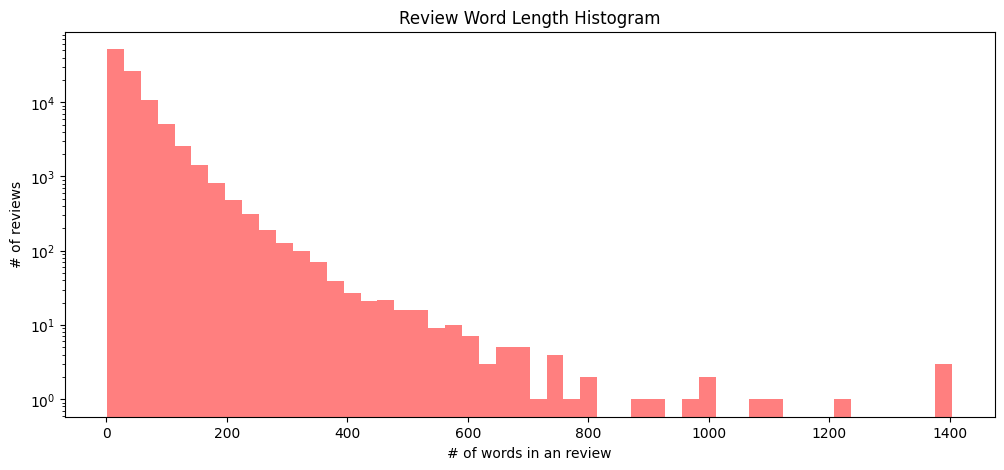

In [ ]:
# 데이터셋에 있는 각 리뷰 별 단어의 개수 분포

plt.figure(figsize = (12,5))

plt.hist(review_len_by_token, bins = 50, alpha=0.5, color="r", label="word")

plt.yscale('log', nonpositive = 'clip')
plt.title('Review Word Length Histogram')
plt.xlabel('# of words in an review') # X축: 한 리뷰 내의 단어 개수
plt.ylabel('# of reviews') # Y축: 전체 리뷰의 개수

# EDA2. 각 리뷰 별 문장 길이

In [ ]:
reviews = list(ds_full_beauty['review'])

# 각 리뷰 별 단어의 개수 저장
review_len_by_char = [len(r) for r in reviews]
review_len_by_char

[88,
 99,
 309,
 108,
 178,
 421,
 141,
 163,
 162,
 152,
 325,
 54,
 203,
 78,
 92,
 52,
 165,
 131,
 75,
 300,
 74,
 65,
 543,
 69,
 579,
 161,
 158,
 144,
 423,
 67,
 230,
 246,
 116,
 2143,
 63,
 334,
 84,
 227,
 98,
 128,
 188,
 191,
 283,
 117,
 438,
 816,
 204,
 2105,
 180,
 57,
 218,
 158,
 723,
 228,
 119,
 1821,
 96,
 183,
 236,
 123,
 175,
 235,
 617,
 315,
 626,
 69,
 266,
 1046,
 48,
 614,
 515,
 248,
 137,
 219,
 184,
 1370,
 235,
 205,
 537,
 361,
 519,
 52,
 164,
 202,
 445,
 103,
 102,
 229,
 177,
 177,
 142,
 169,
 430,
 99,
 155,
 214,
 364,
 323,
 525,
 143,
 68,
 116,
 404,
 126,
 207,
 193,
 204,
 386,
 65,
 55,
 270,
 987,
 266,
 102,
 264,
 207,
 841,
 512,
 132,
 64,
 261,
 494,
 59,
 355,
 563,
 199,
 251,
 155,
 165,
 84,
 231,
 416,
 73,
 54,
 59,
 88,
 130,
 89,
 342,
 206,
 180,
 138,
 135,
 41,
 90,
 228,
 68,
 71,
 73,
 242,
 190,
 77,
 67,
 207,
 81,
 89,
 78,
 75,
 439,
 161,
 100,
 63,
 162,
 63,
 149,
 139,
 306,
 139,
 334,
 115,
 161,
 128,
 217,
 

Text(0, 0.5, '# of reviews')

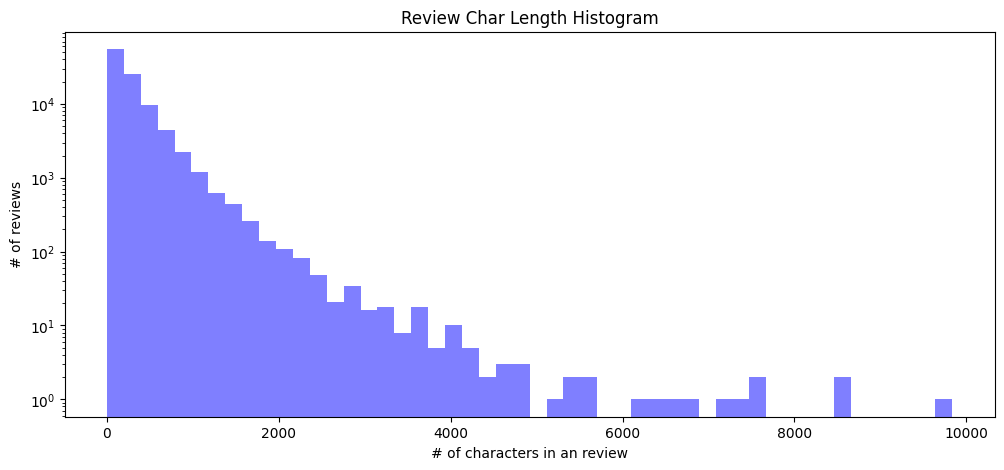

In [ ]:
# 데이터셋에 있는 각 리뷰 별 문장의 길이 분포

plt.figure(figsize = (12,5))

plt.hist(review_len_by_char, bins = 50, alpha=0.5, color="b", label="character")

plt.yscale('log', nonpositive = 'clip')
plt.title('Review Char Length Histogram')
plt.xlabel('# of characters in an review') # X축: 한 리뷰 내의 단어 개수
plt.ylabel('# of reviews') # Y축: 전체 리뷰의 개수

# EDA3. 워드클라우드

In [ ]:
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

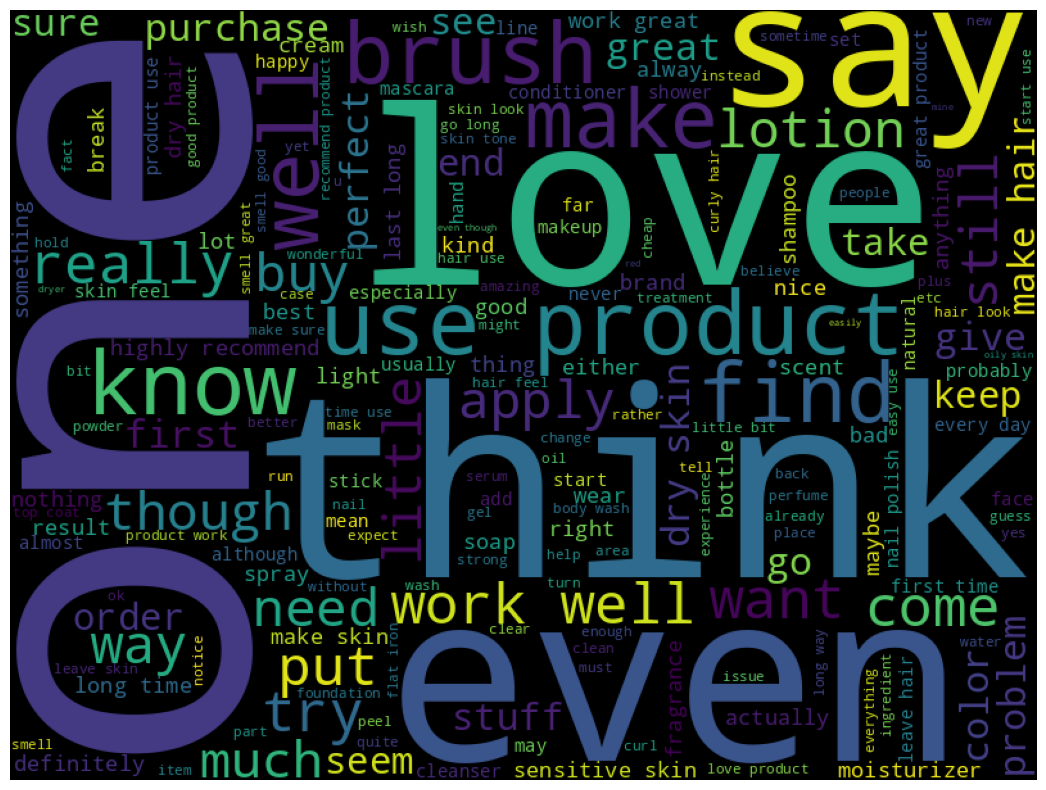

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=600)
wordcloud = wordcloud.generate(' '.join(ds_full_beauty['review']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# EDA 단어 빈도수


In [ ]:
import nltk

# make noun frequency graph per religion
def make_top_word_graph( result, top ):
    tokens = result.split(" ") # 문자열을 공백 기준으로 구분
    text = nltk.Text(tokens) # nltk
    topWord = text.vocab().most_common(top) # top n word
    count = 30 # top word on graph
    xlist = [a[0] for a in topWord[:count ]]
    ylist = [a[1] for a in topWord[:count ]]

    plt.figure(0)
    #font_name = font_manager.FontProperties(fname='./font/font.ttf', size=7).get_name()
    #rc('font', family=font_name) # 한글 적용

    plt.xlabel('Word')
    plt.xticks(rotation=70) # x축 라벨 회전
    plt.ylabel('Count')
    plt.title('keyword' +' TOP '+str(count)+' WORD')
    plt.ylim([10, 33000]) # y축 범위 (최대값을 기준으로 동일하게 설정하기 위함)
    plt.plot(xlist,ylist)
    plt.savefig(result_path+'top-word-graph.png', dpi=400)

    # make text file
    make_top_file(topWord)